## Question 4 - Regression
__Things to do__

* Implement Multilayer Perceptron(MLP) as well as a linear regression model for this question.
* Compare and contrast the performance of both the models on metrics like Root Mean Squared Error(RMSE), Mean Absolute Percentage Error(MAPE) score and any other metrics you feel may be useful.
* Experiment with different architectures(number of hidden layers, activation functions etc) and see the impact on performance. Summarize your findings in the report.
* Experiment on taking some more window of past power values and report the performance (For example taking a window of two hours instead of one).
* For automated evaluation, put your best performing method in regression time series.py and your predicted values for the test set will be generated by running the following: python3 "regression time series.py" "file name"


In [1]:
import regression_time_series as q4

### Linear Regression Model
We use sklearn's LinearRegression model for this. The model is efficient to run. The metrics are as follows: 
RMSE:  0.26 MAE:  0.097 MAPE:  0.107 R2 Score:  0.939
R2 score is decently high at 93.9%. 

One thing to notice is that this doesn't change much with higher value of N, for ex N = 120. N is the number of prior samples we use to predict one - RMSE:  0.258 MAE:  0.097 MAPE:  0.108 R2 Score:  0.94


In [8]:
q4.test_lrmodel(fname = './household_power_consumption.txt', N = 60)

Running Linear Regression Model with N =  60
Time taken to reshape data:   0
New DS shape:  (2075199, 61)
x_data shape:  (2075199, 60)
y_data shape:  (2075199,)
(1661307, 60) training samples
(413892, 60) validation samples
(1661307,) training Y
(413892,) validation Y
Label Shape:  (413892,)
Validation Y shape:  (413892,)
RMSE:  0.26 MAE:  0.097 MAPE:  0.107 R2 Score:  0.939
Linear Regression Model with N =  60  completed.


In [2]:
q4.test_lrmodel(fname = './household_power_consumption.txt', N = 90)

Running Linear Regression Model with N =  90
Time taken to reshape data:   1
New DS shape:  (2075169, 91)
x_data shape:  (2075169, 90)
y_data shape:  (2075169,)
(1659481, 90) training samples
(415688, 90) validation samples
(1659481,) training Y
(415688,) validation Y
Label Shape:  (415688,)
Validation Y shape:  (415688,)
RMSE:  0.259 MAE:  0.097 MAPE:  0.108 R2 Score:  0.94
Linear Regression Model with N =  90  completed.


### MLP Model
We use Keras library for MLP. Multiple parameters of hidden layers, activation_function, epocs, and learning rates were tried, but it doesn't converge (r2 score stays negative). There is not much to report. It may be a problem with this model, but given that CNN/MLP in previous question worked well, and this implementation is very similar, I am inclined to think it is something to do with inadequacy of such a model for such a data and/or my limited understanding of the model. 

RMSE:  1.313 MAE:  0.86 MAPE:  0.607 R2 Score:  -0.556
Test loss: 0.20219532344493832
Test accuracy: 0.14122867584228516


In [2]:
q4.test_mlpmodel(fname = './household_power_consumption.txt', N = 60,
                    hidden_layers = 3, activation_function = 'relu',
                    dropout_prob = 0.2, epochs = 3, learning_rate = 0.001)


Running MLP Model with N =  60
Time taken to reshape data:   0
New DS shape:  (2075199, 61)
x_data shape:  (2075199, 60)
y_data shape:  (2075199,)
(1659746, 60) training samples
(415453, 60) validation samples
(1659746,) training Y
(415453,) validation Y
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120)               7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               14520   

In [7]:
q4.test_mlpmodel(fname = './household_power_consumption.txt', N = 60,
                    hidden_layers = 2, activation_function = 'relu',
                    dropout_prob = 0, epochs = 2, learning_rate = 0.01)


Running MLP Model with N =  60
Time taken to reshape data:   1
New DS shape:  (2075199, 61)
x_data shape:  (2075199, 60)
y_data shape:  (2075199,)
(1659605, 60) training samples
(415594, 60) validation samples
(1659605,) training Y
(415594,) validation Y
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 120)               7320      
_________________________________________________________________
dense_24 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_25 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 121       
Total params: 36,481
Trainable params: 36,481
Non-trainable params: 0
___________________________________________________________

### Experiment with different windows

To do this, I tried to visualize the data to see if there are correlations across different time periods of data. We tried to see hourly, daily and weekly patterns. 

There seems to be some pattern but nothing strong enough. It seems like the data set that can predict will be much bigger than 60 min. 


Time taken to reshape data:   0
New DS shape:  (2075199, 61)
x_data shape:  (2075199, 60)
y_data shape:  (2075199,)


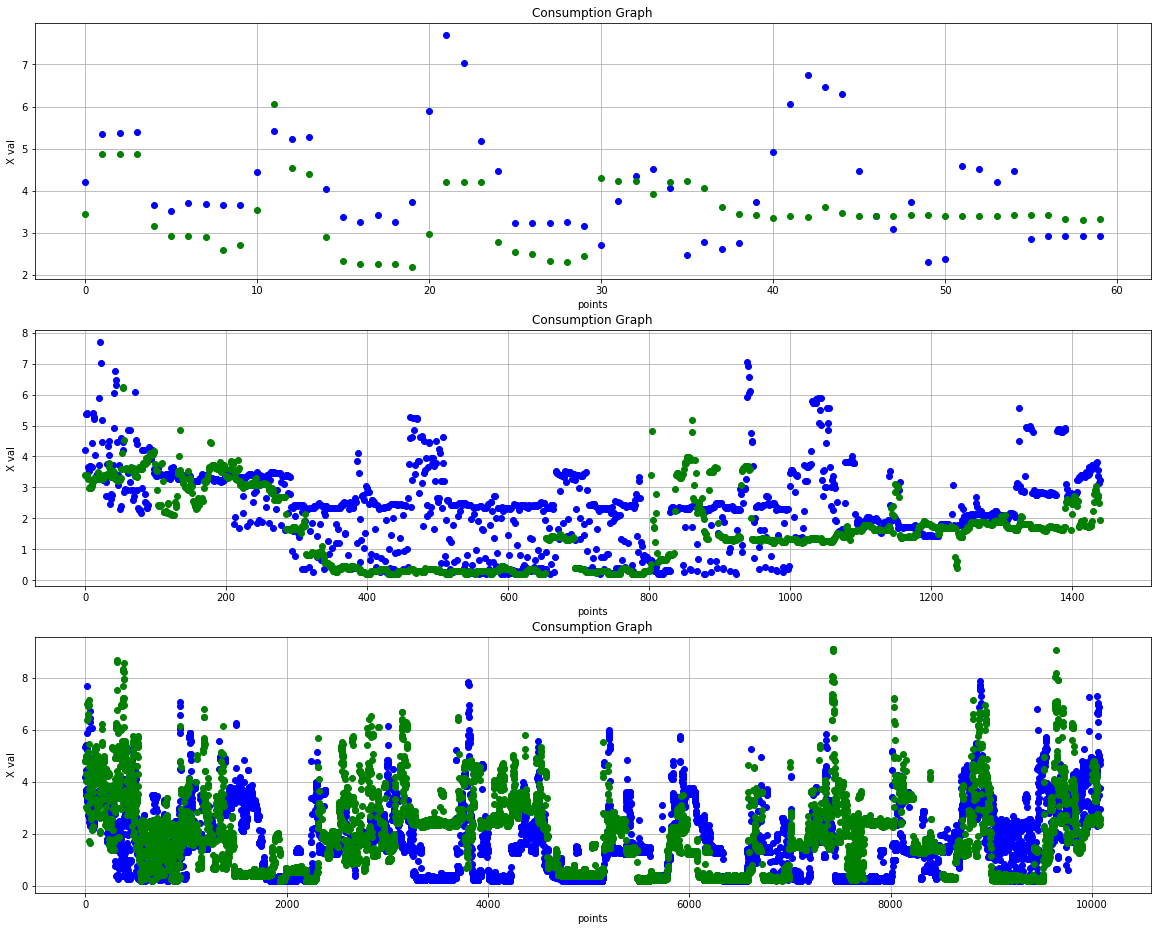

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plotpair(ax, t, s1, s2 = None, title = "Some Plot"):

    #fig, ax = plt.subplots(figsize = (12, 5))
    ax.plot(t, s1, 'bo')
    if (s2 is not None):
        ax.plot(t, s2, 'go')


    ax.set(xlabel='points', ylabel='X val',
           title='Consumption Graph')
    ax.grid()
    
m = q4.Q4Model()
m.set_training_data(fname = './household_power_consumption.txt', N=60)

d1 = [60, 60*24, 60*24*7]
d2 = ['hourly', 'daily', 'weekly']

data = m.fulldata

offset = 0

t = list(range(duration))
s1 = data[offset:duration+offset]
s2 = data[offset+duration:offset+duration*2]


fig, ax = plt.subplots(3, 1, figsize = (20, 16))

for i in range(3):
    duration = d1[i]
    t = list(range(duration))
    s1 = data[offset:duration+offset]
    s2 = data[offset+duration:offset+duration*2]
    plotpair(ax[i], t, s1, s2, title = d2[i])
    
plt.show()
    

### Automated Evaluation
The logic for creating the test data is as follows: 
1. Read the first N numbers. If there are any missing, fill them like missing values (use ffill/pad). 
2. Find all the locations of missing values that need to be predicted and add to list, say Y
3. For each element in L1 (say L1[i]), form X[i-N,i] as the Xi and use it to predict the value of X[i]
